# SETUP
1. Copy this notebook to your own Google Drive
2. In your own copy, on the lefthand sidebar, click on the folder icon to view your files
3. Navigate to `content/` folder, which should contain a `sample_data/` subfolder. Create a new folder, `tarot-analyzer-data/` in `content/` folder.
4. Upload all data files into `tarot-analyzer-data/`


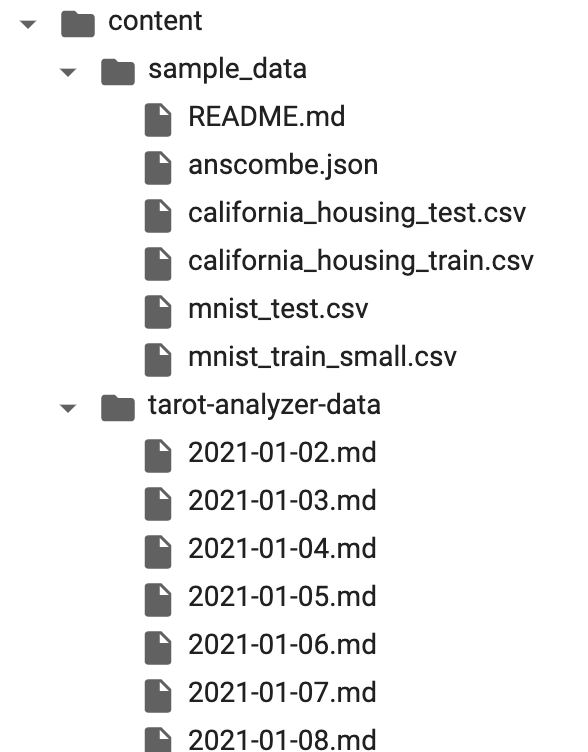

<AxesSubplot:xlabel='suits'>

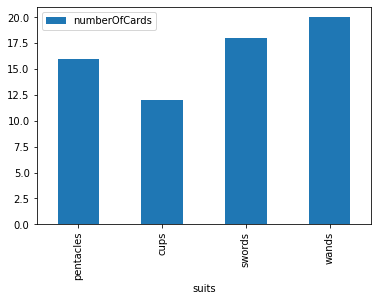

In [1]:
from os import listdir
import yaml
import pandas as pd
import matplotlib.pyplot as plt

# Read the files (how to read a file?)
def readFile(filePath):
  file = open(filePath, 'r') # Open file at filePath for reading
  fileContent = file.read() # Read all contents of file
  file.close() # Close the file opening stream so that other processes can use the file

  return fileContent

## Parse frontmatter, returning the first non-empty document only
def parseFrontmatter(content):
  documents = yaml.safe_load_all(content)

  i = 1
  for doc in documents:
      if doc is not None and i == 1:
          return doc

      i += 1

# What files are there? (how to get list of files in a directory)
DATA_DIR = "/Users/kyurikotpq/Desktop/Projects/tarot-analyzer/sample-data" # Replace this with your own path. In Colab it would be "/content/tarot-analyzer-data"
listofFiles = listdir(DATA_DIR)

ultimateListOfCards = []

for filePath in listofFiles:
  fullMDFilePath = DATA_DIR + "/" + filePath
  fileContent = readFile(fullMDFilePath) # By right, should check for file extension and whether it's a directory or not
  
  # For each file, I need the front part (how to get the frontmatter only?)
  frontmatter = parseFrontmatter(fileContent)
  
  # Need to add the list of cards in the file to "ultimate list of cards"
  ultimateListOfCards.extend(frontmatter['cards'])

# Ultimately, I need to categorise the cards that I have (using what data type?)
# Task 1 - Minor Arcana Suits Comparison
minorComparison = {'pentacles': 0, 'cups': 0, 'swords': 0, 'wands': 0 }
for cardCode in ultimateListOfCards:
  if not cardCode.startswith("m-"):
    cardCodeParts = cardCode.split("-") # split by dashes

    # Since the suit code is always after the first dash, we can find it at index 1 after the split
    if cardCodeParts[1] == 'p':
      minorComparison['pentacles'] = minorComparison['pentacles'] + 1
    elif cardCodeParts[1] == 'w':
      minorComparison['wands'] = minorComparison['wands'] + 1
    elif cardCodeParts[1] == 'c':
      minorComparison['cups'] = minorComparison['cups'] + 1
    elif cardCodeParts[1] == 's':
      minorComparison['swords'] = minorComparison['swords'] + 1

# Use a library (pandas) to draw the graphs based on the different tables that I have
# Structure data into a DataFrame and then plot the bar graph
minorComparisonDF = pd.DataFrame({'suits': minorComparison.keys(), 'numberOfCards': minorComparison.values()})
minorComparisonDF.plot.bar(x='suits', y='numberOfCards')

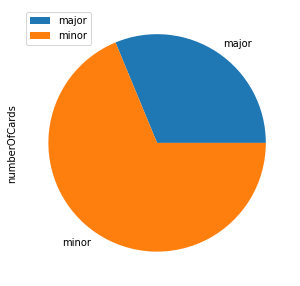

In [2]:
# Task 2 - Major and Minor Arcana
majorMinorComparison = { "major": 0, "minor": 0 }
for cardCode in ultimateListOfCards:
    if cardCode.startswith("m-"):
        # Dealing with a reversed card - add it to the "reversed" key
        majorMinorComparison["major"] = majorMinorComparison["major"] + 1
    else:
        majorMinorComparison["minor"] = majorMinorComparison["minor"] + 1

# Use a library (pandas) to draw the graphs based on the different tables that I have
# Structure data into a DataFrame and then plot the bar graph
majorMinorComparisonDF = pd.DataFrame({'numberOfCards': majorMinorComparison.values()},
                  index=majorMinorComparison.keys())
# majorMinorComparisonDF.head()

majorMinorComparisonPlot = majorMinorComparisonDF.plot.pie(y='numberOfCards', figsize=(5, 5))

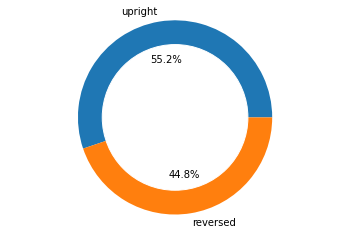

In [3]:
# Task 3 - Upright VS Reversed Donut Plot
uprightComparison = { "upright": 0, "reversed": 0 }
for cardCode in ultimateListOfCards:
    if cardCode.endswith("-r"):
        # Dealing with a reversed card - add it to the "reversed" key
        uprightComparison["reversed"] = uprightComparison["reversed"] + 1
    else:
        uprightComparison["upright"] = uprightComparison["upright"] + 1

# Calculate percentages
totalNumberOfCards = sum(uprightComparison.values())
for key in uprightComparison.keys():
    uprightComparison[key] = uprightComparison[key] / totalNumberOfCards

# Plot pie chart
labels = uprightComparison.keys()
percentageOfCards = uprightComparison.values()

plt.pie(percentageOfCards, labels=labels, autopct='%1.1f%%')
        
# draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  